In [107]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics import accuracy_score

In [108]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [109]:
# configuring matplotlib
plt.axes.titlesize : 24
plt.axes.labelsize : 20
plt.figsize = (15, 10)
# plt.cmap.

In [110]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [111]:
raw_data = pd.read_csv('../data/raw/ISEAR.csv', header=None)
raw_data.head(15)

,0,1,2
0,0,joy,On days when I feel close to my partner and ot...
1,1,fear,Every time I imagine that someone I love or I ...
2,2,anger,When I had been obviously unjustly treated and...
3,3,sadness,When I think about the short time that we live...
4,4,disgust,At a gathering I found myself involuntarily si...
5,5,shame,When I realized that I was directing the feeli...
6,6,guilt,I feel guilty when when I realize that I consi...
7,7,joy,After my girlfriend had taken her exam we went...
8,8,fear,"When, for the first time I realized the meanin..."
9,9,anger,When a car is overtaking another and I am forc...


In [112]:
raw_data.columns = ['index', 'sentiment', 'text']
raw_data.set_index('index')
raw_data.head()

,index,sentiment,text
0,0,joy,On days when I feel close to my partner and ot...
1,1,fear,Every time I imagine that someone I love or I ...
2,2,anger,When I had been obviously unjustly treated and...
3,3,sadness,When I think about the short time that we live...
4,4,disgust,At a gathering I found myself involuntarily si...


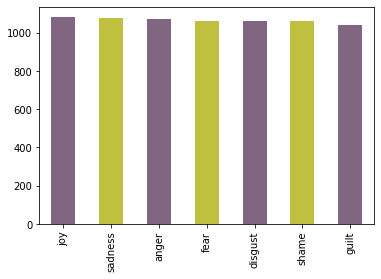

In [113]:
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*7 # <-- make two custom RGBs and repeat/alternate them over all the bar elements.

raw_data['sentiment'].value_counts().plot(kind='bar', stacked=True, color=my_colors)
plt.savefig('../images/sentiment_distribution.png')

From above graph it is clear that all classes of sentiment have almost equal number of instances

In [114]:
def make_wordcloud(texts, stopwords=STOPWORDS):
    texts = texts.lower()
    sw = set(stopwords)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(texts)
    return wordcloud

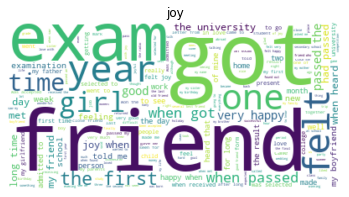

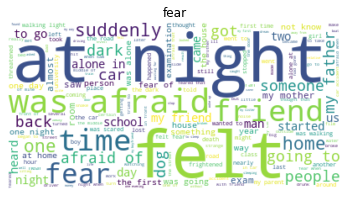

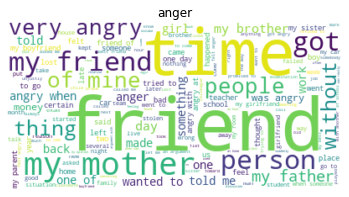

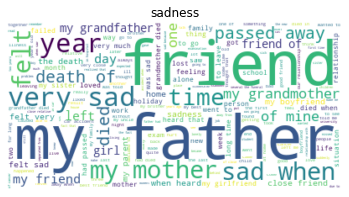

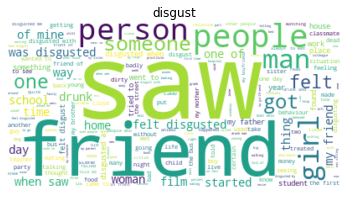

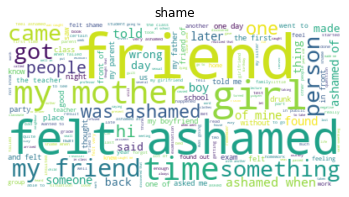

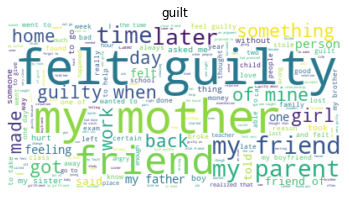

In [115]:
# def plot_wordclouds(dataframe, subplot_rows, subplot_columns):

rows = 4
columns = 3
fig = plt.figure()
p = 0

for col in raw_data['sentiment'].unique():
    temp_df = raw_data[raw_data['sentiment']==col]
    temp_df_texts = " ".join(text for text in temp_df['text'])
    
    wordcloud = make_wordcloud(temp_df_texts)
    
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(col)
    image_name = '../images/'+ col+ '_wordcloud.png'
    plt.savefig(image_name)
    plt.show()
    


From above plots it is common that words like friend, mother, felt is common in all the texts. So we will need to remove them.

## Creating a new column that will hold the text as a list of words

In [116]:
frequent_words = []
def get_most_common_words(dataframe):
    for col in dataframe['sentiment'].unique():
        temp_df = dataframe[raw_data['sentiment']==col]
        temp_df_texts = " ".join(text for text in temp_df['text'])
        temp_df_texts = temp_df_texts.lower()

        wordcloud = make_wordcloud(temp_df_texts)
        frequent_words.append(list(wordcloud.words_.keys())[:50])
        
    return frequent_words
    
     

In [117]:
most_frequent_words = get_most_common_words(raw_data)

In [118]:
print(len(most_frequent_words))
p =set(most_frequent_words[0])

7


In [119]:
for i in range(1, len(most_frequent_words)):
    print(i)
    p.intersection_update(set(most_frequent_words[i]))
print(p)

1
2
3
4
5
6
{'got', 'day', 'friend', 'felt', 'my friend', 'time', 'one'}


The words present above are the most frequent words so they can also be removed from the text.

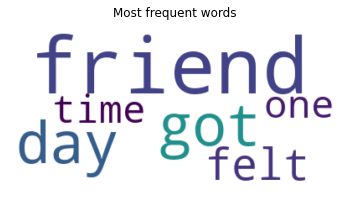

In [120]:
p = " ".join(list(p))
most_frequent_wordcloud = make_wordcloud(p)


plt.imshow(most_frequent_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words')

image_name = '../images/'+ 'most_frequent_words'+ '_wordcloud.png'
plt.savefig(image_name)
plt.show()

In [121]:
raw_data['text_length'] = raw_data['text'].apply(lambda x: len(x.split(' ')))
raw_data.head()

,index,sentiment,text,text_length
0,0,joy,On days when I feel close to my partner and ot...,34
1,1,fear,Every time I imagine that someone I love or I ...,18
2,2,anger,When I had been obviously unjustly treated and...,15
3,3,sadness,When I think about the short time that we live...,32
4,4,disgust,At a gathering I found myself involuntarily si...,24


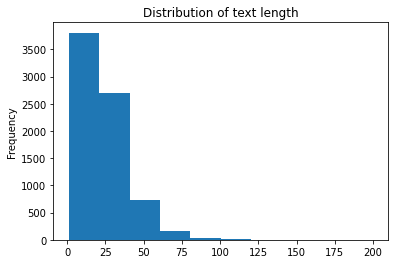

In [126]:
raw_data['text_length'].plot.hist()
plt.title('Distribution of text length')
plt.savefig('../images/distribution_of_text_length.png')

In [96]:
stopwords = list(STOPWORDS) + list(p)

## Converting all the text to lowercase

In [97]:
raw_data['text'] = raw_data['text'].apply( lambda x: x.lower())
raw_data.head()

,index,sentiment,text
0,0,joy,on days when i feel close to my partner and ot...
1,1,fear,every time i imagine that someone i love or i ...
2,2,anger,when i had been obviously unjustly treated and...
3,3,sadness,when i think about the short time that we live...
4,4,disgust,at a gathering i found myself involuntarily si...


In [98]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    stop_words = 'english', # removes common english words
    ngram_range = (2, 2), # extracting bigrams
    lowercase = True,
)

features = vectorizer.fit_transform(
    raw_data['text']
)

tfidf_transformer = TfidfTransformer()

features = tfidf_transformer.fit_transform(features)

In [99]:
features_nd = features.toarray() # for easy usage
# print(features_nd.shape)
# raw_data['text_vectorized'] = list(features_nd)
# print(raw_data['text_vectorized'].shape)
# raw_data.head()

The vectorizer will also need to be saved. Because we will need to use the same vectorizer for making new predictions

In [100]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
raw_data['sentiment_encoded'] = le.fit_transform(raw_data['sentiment'])

In [101]:
# raw_data = raw_data[['sentiment_encoded','text_vectorized']]

Save the label encoder as a pickle or in some form. Make a function that takes column names as input, converts the column, saves the label encoder and then returns the new column values.

In [102]:
# Saving the processed data
# raw_data.to_csv('../data/processed/sentiment_features.csv')

## Making the actual model

In [103]:
# Diving data into train, validation and test set
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = features_nd, raw_data['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# X_train, X_test = list(X_train), list(y_train)

### knn model

In [176]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [177]:


predicted_results = knn.predict(X_test)

accuracy = accuracy_score(y_test, predicted_results)
accuracy

0.17181208053691274

### naive bayes'

In [104]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3275167785234899

### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3718120805369127

### SGD

In [106]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(random_state=RANDOM_STATE)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4167785234899329

## Random Search with SGD

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

clf = SGDClassifier()

distributions = dict(
    loss=['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    learning_rate=['optimal', 'invscaling', 'adaptive'],
    eta0=uniform(loc=1e-7, scale=1e-2)
)

random_search_cv = RandomizedSearchCV(
    estimator=clf,
    param_distributions=distributions,
    cv=5,
    n_iter=50
)

random_search_cv.fit(X_train, y_train)


KeyboardInterrupt: 

In [52]:
! ls

01.01_bb_EDA_2020_05_11.ipynb
01.01_bb_EDA_emotion_classification_2020_05_13.ipynb
01.01_pl_EDA_2020_05_11.ipynb
carads-tp-data_exploration.ipynb
